# Projeto - Machine Learning I | Santander Coders 2024.2 - DS
_*Pré-processamento, modelagem e análise técnica._

## Problema de Negócios 

Uma fintech gostaria de mapear perfis de bons pagadores a fim de otimizar o processo de concessão de crédito. Nos propomos a resolver este problema de negócios desenvolvendo modelos de aprendizagem de máquina supervisionada para problemas de classificação binária. 

## Dicionário dos dados 

O dataset é da [Kaggle](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc/data) e possui 14 colunas e 5000 linhas.

- **ID**: Identificador do cliente.
- **Age** : Idade (em anos).
- **Experience** : Experiência de trabalho (em anos). 
- **Income** : Renda anual (em milhares).
- **ZipCode**: Código postal da residência.
- **Family** : Número de membros da família.
- **CCAvg**: Média do gasto mensal com cartão de crédito (em milhares).
- **Education**: Nível de escolaridade do cliente.
   - 1: Graduação
   - 2: Mestrado
   - 3: Nível Avançado
- **Mortgage**: Valor do financiamento, se existente (em milhares).
- **Securities Account** : Se o cliente tem ou não ativos ou títulos do banco.
- **CD Account** : Se o cliente tem ou não certificado de depósito bancário do banco.
- **Online** : Se o cliente tem ou não acesso a funcionalidades do Internet Banking.
- **Credit Card** : Se o cliente tem ou não cartão de crédito do banco.
- **Personal Loan**: Se o empréstimo pessoal foi ou não aprovado.
  - 0: crédito pessoal não aprovado
  - 1: crédito pessoal aprovado

## Bibliotecas 

In [85]:
# Manipulação e visualização de dados
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Pré-processamento de dados 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Classificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Métricas de desempenho 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap

# Controle de warnings 
import warnings
warnings.filterwarnings('ignore')

## Carregando os dados

In [86]:
df_original = pd.read_csv("C:/Users/User/Santander Coders - Projetos Finais/Módulo 05 - Machine Learning I/bankloan.csv")
df = df_original.reset_index(drop=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [88]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP.Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
dtype: int64

**Observações**
- O dataset não possui colunas com valores nulos.
- Não há identificadores repetidos.
- Algumas variáveis foram classificadas como numéricas, mas os seus valores representam categorias:
  - Education
  - Personal.Loan
  - Securities.Account
  - CD.Account
  - Online
  - CreditCard

## Exploração inicial dos dados 

In [89]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Estatísticas descritivas gerais

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observações**

- _Fazer observações sobre as estatísticas descritivas das variáveis_

### Estatísticas descritivas por classes 

In [91]:
sns.set_context('paper')
sns.set_style('white')
# plt.rcParams['figure.dpi'] = 120

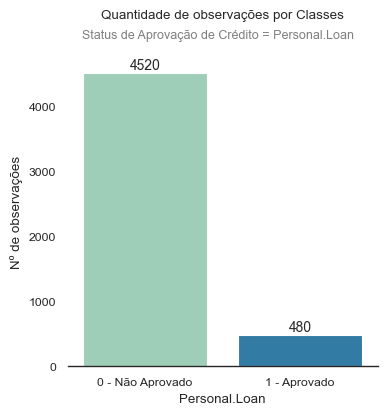

In [92]:
plt.figure(figsize=(4, 4))
plt.title('Quantidade de observações por Classes', y=1.1)
plt.figtext(0.5, 0.93, 'Status de Aprovação de Crédito = Personal.Loan', ha = 'center', color = 'gray', fontsize = 9)

dados_target = df['Personal.Loan'].value_counts()

ax= sns.barplot(data = dados_target, palette = 'YlGnBu')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.ylabel('Nº de observações')
plt.xticks(ticks=[0, 1], labels=['0 - Não Aprovado', '1 - Aprovado'])
sns.despine(left = True)
plt.show()

In [93]:
df['Personal.Loan'].value_counts(normalize = True)

Personal.Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

O dataframe tem classes bem desbalanceadas na proporção aproximada de 10:1.

In [94]:
colunas = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
           'Securities.Account', 'CD.Account', 'Online', 'CreditCard']

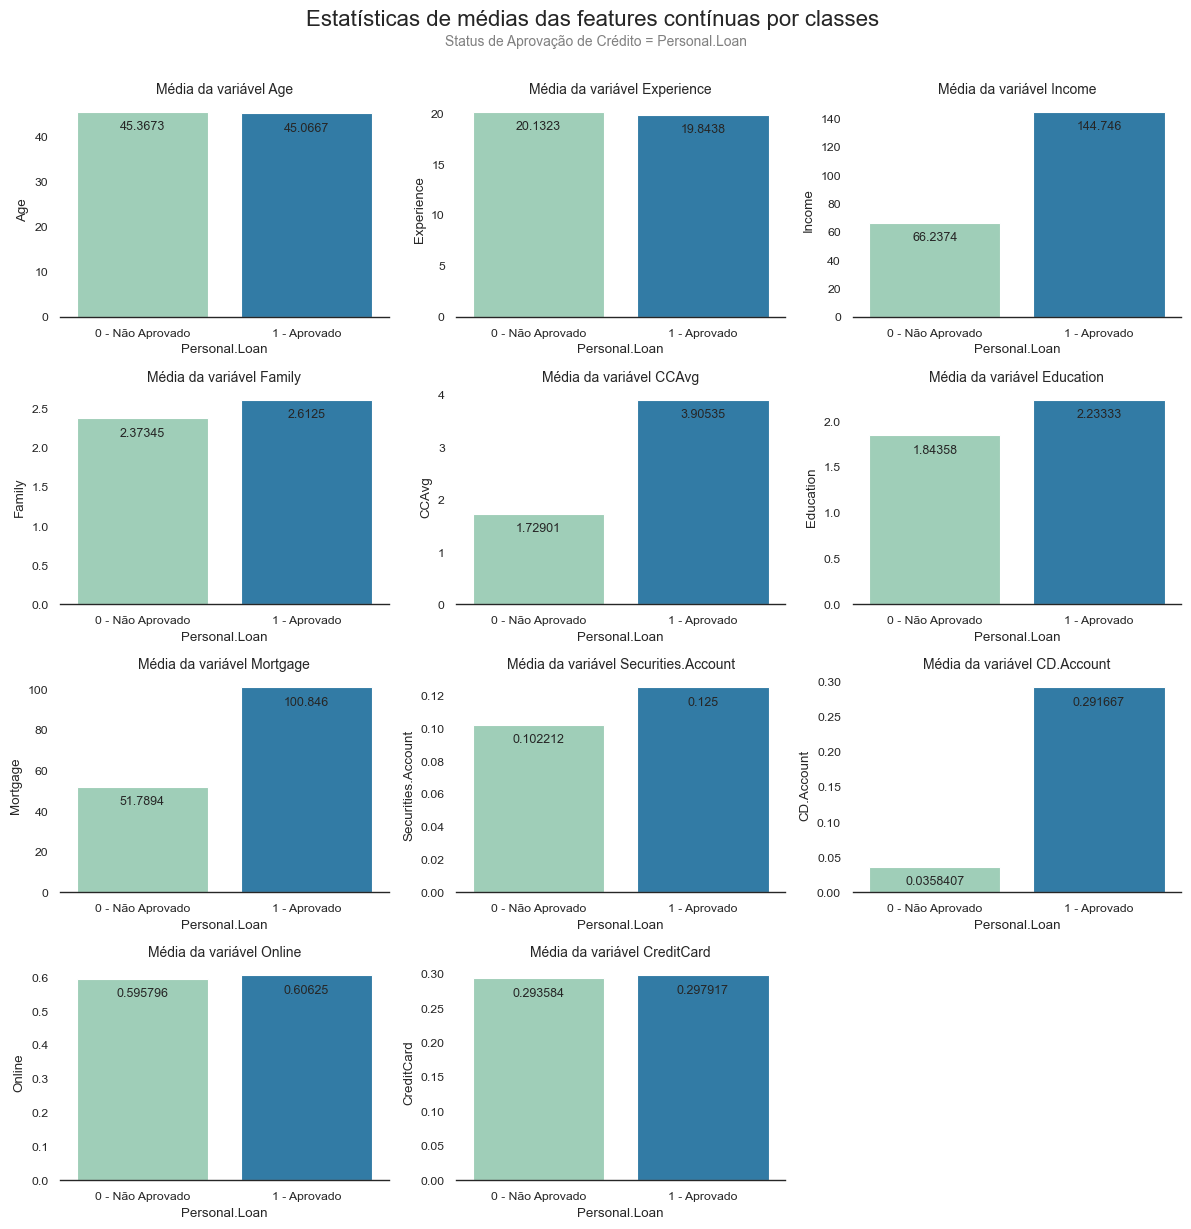

<Figure size 768x576 with 0 Axes>

In [95]:
plt.figure(figsize = (12, 12))
plt.suptitle('Estatísticas de médias das features contínuas por classes ', y=1.02, fontsize=16)
plt.figtext(0.5, 0.99, 'Status de Aprovação de Crédito = Personal.Loan', ha='center', fontsize=10, color='gray')

for i, q in enumerate(colunas, 1):
    plt.subplot(4, 3, i)
    estatisticas_media = df.groupby(['Personal.Loan'])[q].mean().reset_index()
    ax = sns.barplot(data = estatisticas_media, x = 'Personal.Loan', y = q, palette = 'YlGnBu')
    ax.bar_label(ax.containers[0], fontsize=9, padding = -15)
    ax.bar_label(ax.containers[1], fontsize=9, padding = -15)
    sns.despine(left = True)
    plt.xticks(ticks=[0, 1], labels=['0 - Não Aprovado', '1 - Aprovado'])
    plt.title(f'Média da variável {q}', fontsize=10)

plt.tight_layout()
plt.figure(dpi=120)
plt.show()

**Observações**

- Income, Family, CCAvg, Education, Mortgage, SecuritiesAccount e CDAccount tem valores médios bem diferentes por classes. Isso sugere que essas variáveis podem dar maior capacidade discriminativa ao modelo. 

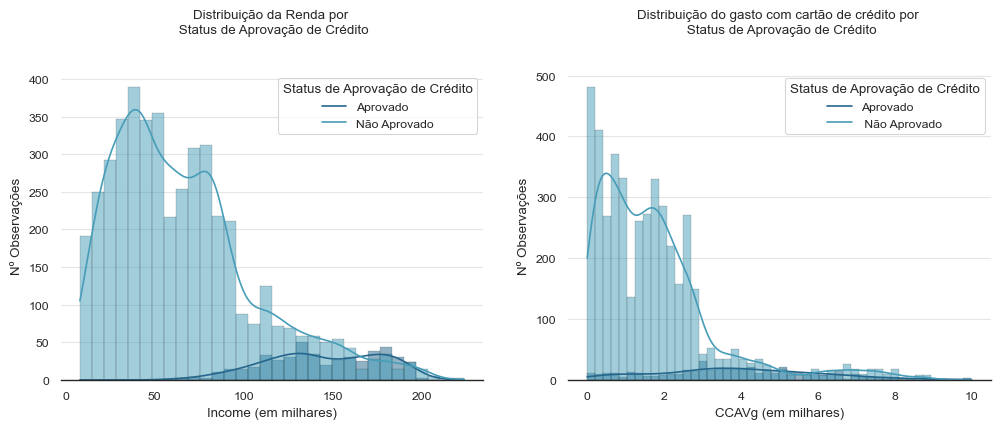

<Figure size 768x576 with 0 Axes>

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x="Income", hue="Personal.Loan", palette = 'YlGnBu_d', 
             kde = True, linewidth = .1, ax = ax[0], edgecolor = 'black')

ax[0].set_title('Distribuição da Renda por \n Status de Aprovação de Crédito', y = 1.1)
ax[0].set_ylabel('Nº Observações')
ax[0].set_xlabel('Income (em milhares)')
ax[0].legend(title="Status de Aprovação de Crédito", labels=['Aprovado', 'Não Aprovado'])
ax[0].grid(axis = 'y', alpha = 0.5)
ax[0].grid(axis = 'x', alpha = 0)

sns.histplot(data=df, x="CCAvg", hue="Personal.Loan", palette = 'YlGnBu_d', 
             kde = True, linewidth = .1, ax = ax[1], edgecolor = 'black')

ax[1].set_title('Distribuição do gasto com cartão de crédito por \n Status de Aprovação de Crédito', y = 1.1)
ax[1].set_ylabel('Nº Observações')
ax[1].set_xlabel('CCAVg (em milhares)')
ax[1].legend(title="Status de Aprovação de Crédito", labels=['Aprovado', ' Não Aprovado'])
ax[1].grid(axis = 'y', alpha = 0.5)
ax[1].grid(axis = 'x', alpha = 0)

sns.despine(left = True)
plt.figure(dpi=120)
plt.tight_layout()
plt.show()

### Correlações 

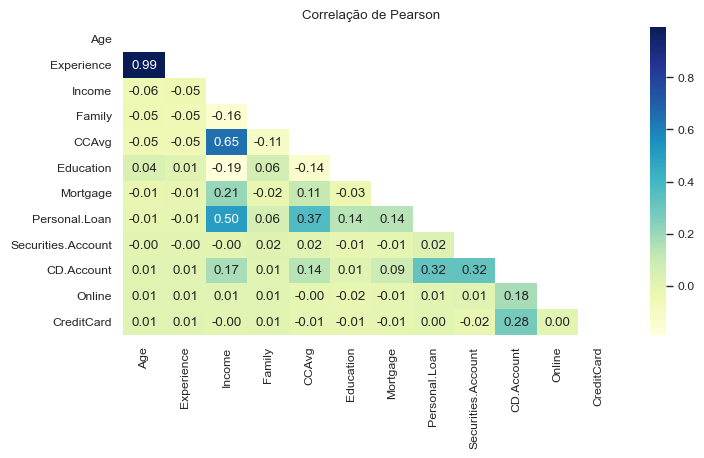

In [97]:
plt.figure(figsize=(8, 4)) 

dados = df.drop(columns = ['ID', 'ZIP.Code'], axis =1)
correlation_matrix = dados.corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            mask=mask, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlação de Pearson")
plt.show()

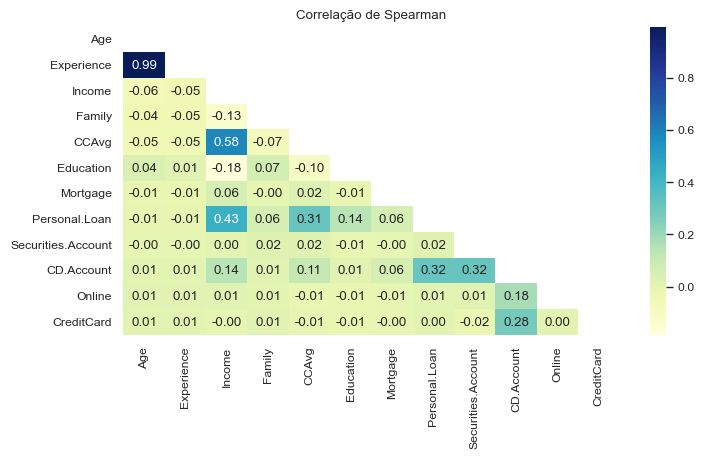

In [98]:
plt.figure(figsize=(8, 4)) 

dados = df.drop(columns = ['ID', 'ZIP.Code'], axis =1)
correlation_matrix = dados.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            mask=mask, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlação de Spearman")
plt.show()

**Observações**

Pelo gráfico de correlação de spearman, percebe-se que:
- As variáveis Experience e Age são forte e positivamente correlacionadas. Isso é totalmente esperado dado que os anos de experiência no mercado de trabalho aumentam a medida que envelhecemos. 
- As variáveis CCAvg e Income têm correlação positiva e considerável. Isso faz sentido porque é normalmente esperado que o os gastos mensais aumentem a medida que a renda cresce.
- A variável Personal.Loan é positivamente correlacionada com Income, CCAvg e Education. Isso nos sugere que as variáveis de renda anual, média de consumo e nível educacional pode exeplicar melhor a probabilidade de aprovação do empréstimo comparado às outras variáveis.
- A correlação entre as variáveis Education e Income é negativa. Apesar de fraca, é minimamente curioso níveis de escolaridade mais altos estarem associados a uma renda mais baixa.

**Correlação de Pearson vs. Correlação de Spearman.**

Apesar dos gráficos de correlação pelos métodos de Pearson e Spearman apresentarem padrões semelhantes, a correlação de pearson não é tão adequada para avaliar a correlação entre variáveis categóricas e numéricas.A correlação de Spearman é mais adequada porque avalia a relação monotônica entre as variáveis já que faz correlações baseada em rankeamento.

### Outliers

In [99]:
colunas_num_continuas = ['Age', 'Experience', 'Income', 'CCAvg']

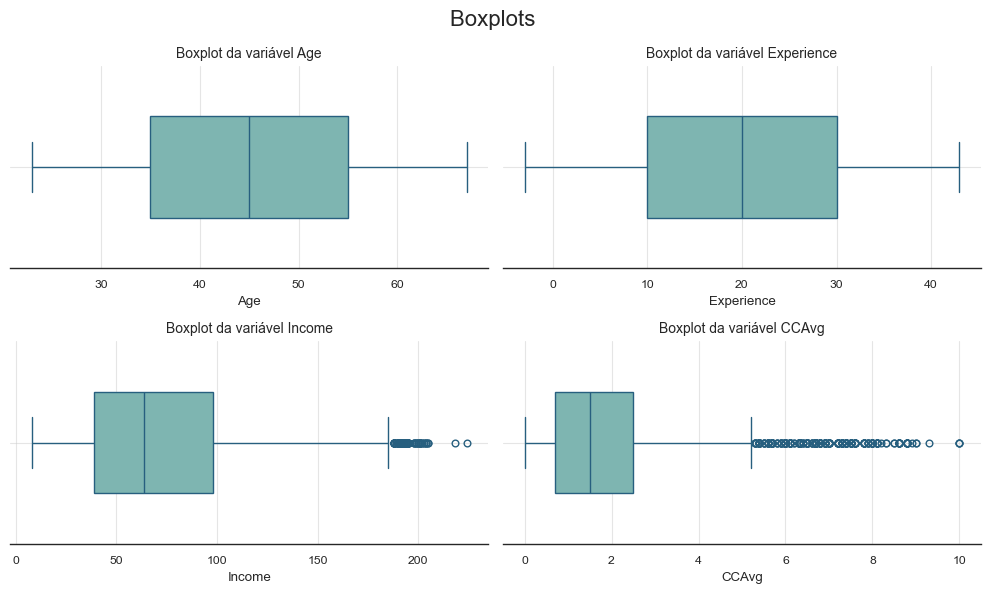

In [100]:
plt.figure(figsize = (10, 6))
plt.suptitle('Boxplots ', fontsize=16)

for i, q in enumerate(colunas_num_continuas, 1):
    paleta = sns.color_palette('YlGnBu_d')
    plt.subplot(2, 2, i)
    ax = sns.boxplot(data = df[q], color = paleta[0], linecolor = paleta[4], orient='h', width=0.5)
    sns.despine(left = True)
    plt.title(f'Boxplot da variável {q}', fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

## Pré-processamento 

Justificativas de algumas escolhas do pré-processamento:

1. **Divisão do treino e teste:** A divisão do conjunto de dados foi feita antes de qualquer transformação das features para evitar o vazamento de dados. Além disso, a divisão do conjunto foi estratitificada na proporção 80/20 por causa do desbalancemaneto das classes. Um conjunto de treino maior (80%) garante que o modelo tenha mais insumos para aprender padrões relacionados a classe minoritária.
2. **Codificação de variáveis:** As variáveis 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online' e 'CreditoCard' são binárias e, por isso, dispensa o uso de técnica de codificação (como o LabelEncoder, por exemplo). O OneHotEncoder foi utilizado para codificar a variável categórica 'Education'.
3. **Escalonamento:** As variáveis de renda e consumo têm outliers. O RobustScaler foi escolhido como técnica de escalonamento por ser menos sensível a outliers comparado ao Standard Scaler e MinMaxScaler.
   - **RobustScaler:** Utiliza a mediana e o intervalo interquantílico (IQR) para escalonar os dados. Isso deixa a distribuição dos dados mais representativa em um determinado intervalo porque a técnica é menos sensível a outliers.
   - **StandardScaler:** Utiliza a média e o desvio padrão para escalonar aproximando a distribuição dos dados para uma forma normal. Essa técnica é menos robusta para outliers porque a média pode ser bastante influenciada por valores discrepantes.
   - **MinMaxScaler:** Transforma os dados para valores dentro do intervalo [0, 1] e a presença de outliers pode adicionar distorções a distribuição. 
5. **Imputação de valores ausentes:** Não foi nenhuma técnica de imputação porque o conjunto de dados não possui valores ausentes. 

In [101]:
# Modificação na variável categórica de educação
df['Education'] = df['Education'].replace({1: 'Graduacao', 2: 'Mestrado', 3: 'Nível Avançado'})

In [102]:
X = df.drop(columns = ['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = df['Personal.Loan']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [104]:
print(f'X_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'X_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

X_train - Proporção da classe 0: 0.904
y_train - Proporção da classe 1: 0.096
X_test - Proporção da classe 0: 0.904
y_test - Proporção da classe 1: 0.096


In [105]:
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
categorical_features = ['Education']

In [106]:
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [107]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [108]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Modelagem e Análise de desempenho 

**Modelos testados**
- [LogisticRegression](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [AdaBoostClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [RandomForestClassifier (Esemble Bagging)](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [XGBoost (Esemble Boosting)](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier:~:text=object-,class,%EF%83%81,-Bases%3A%20XGBModel%2C%20Classifier)

**Métricas de desempenho para modelos de classificação**

1. **Acurácia**
   - **Descrição:** Qual a porcentagem de acerto geral do modelo?
   - **Estratégias de uso:** O custo de um FN e FP são semelhantes e o benefício de um TP e TN são semelhantes.
   - **Fórmula:** \\(\text{Accuracy} = \frac{TP + TN}{Nº de observações}\\)
2. **Precisão**
   - **Descrição:** Qual a porcentagem de todas as predições positivas estão realmente corretas?
   - **Estratégias de uso:** O custo de um FP é bem maior que o do FN e o benefício de um TP é bem maior que o do TN.
   - **Fórmula:** \\(\text{Precision} = \frac{TP}{TP + FP}\\)
3. **Recall/Sensibilidade**
   - **Descrição:** Qual é a porcentagem de acerto (predições positivas) do modelo entre todas as instâncias realmente postivas?
   - **Estratégias de uso:** O custo de um FN é maior do que o do FP.
   - **Fórmula:** \\(\text{Sensitivity} = \frac{TP}{TP + FN}\\)
4. **Recall/Especificidade**
   - **Descrição:** Qual é a porcentagem de acerto (predições negativas) do modelo entre todas as instâncias realmente negativas?
   - **Estratégias de uso:** O custo de um TN é maior do que o do TP.
   - **Fórmula:** \\(\text{Specificity} = \frac{TN}{TN + FP}\\)
5. **F1-Score**
    - **Descrição:** É a média harmônica entre precisão e recall.
   - **Estratégias de uso:** Ideal para avaliar modelo que lida com classes desbalanceadas.
   - **Fórmula:** \\(\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\\)
6. **ROC-AUC**
   - **Descrição:** Gera a probabilidade de valores pertencer a uma determinada classe em vez de gerar apenas valores binários.
   - **Estratégias de uso:** Ideal para analisar o trade-off entre TP e FP para cada valor de threshold, mas não é recomendado para dados com classes desbalanceadas porque pode levar a uma interpretação incorreta.  

**Principais métricas analisadas**

Todas as métricas de desempenho para modelos de classificação foram analisadas, mas a **Precisão** e o **F1-score** foram os principais critérios de escolha do modelo considerando a natureza do problema. Nos casos de um FN, o banco pode deixar de ganhar dinheiro ao negar crédito a um bom pagador, já nos casos de um FP o banco perde dinheiro aprovando crédito a um mau pagador. Considerando que os custos de um FP pode ser razoavelmente maior que um FN em nosso problema de negócio, a precisão e o f1-score (macro avg) serão priorizadas.

Obs.: A f1-score (macro avg) é a média do f1-score para as classes 0 e 1, já o f1-score (weighted) é a média ponderada do f1-score das classes cujo peso é a frequência das instâncias negativas (0) e positivas (1), como o objetivo da solução é maximizar o acerto do modelo para classe minoritária usaremos a métrica menos influenciada pela classe majoritária, o f1-score (macro avg). Informações mais detalhadas sobre as métricas de desempenho podem ser encontradas neste [link.](https://www.datacamp.com/blog/classification-machine-learning)

### Experimento 00 - Geral*
_*Com hiperparâmetros de todos os modelos em default._

LogisticRegression 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       904
           1       0.83      0.70      0.76        96

    accuracy                           0.96      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.95      0.96      0.96      1000

ROC AUC score: 0.9551


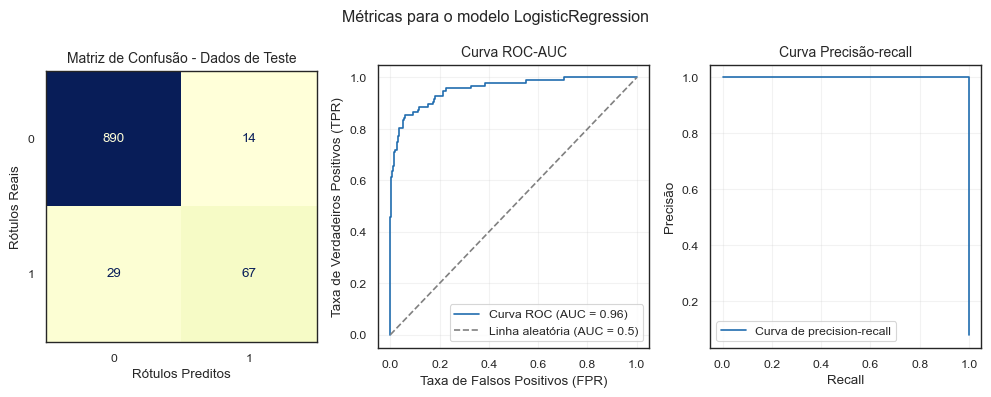

<Figure size 960x720 with 0 Axes>

DecisionTree 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.91      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9742


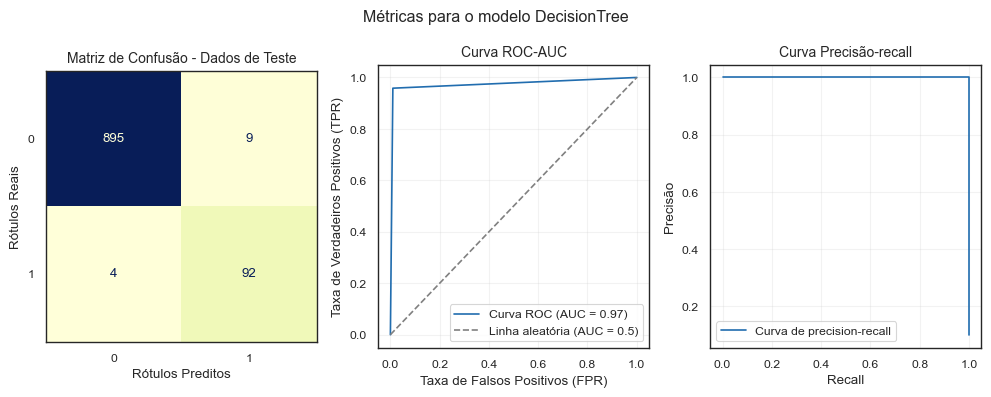

<Figure size 960x720 with 0 Axes>

KNN 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.97      0.69      0.80        96

    accuracy                           0.97      1000
   macro avg       0.97      0.84      0.89      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9479


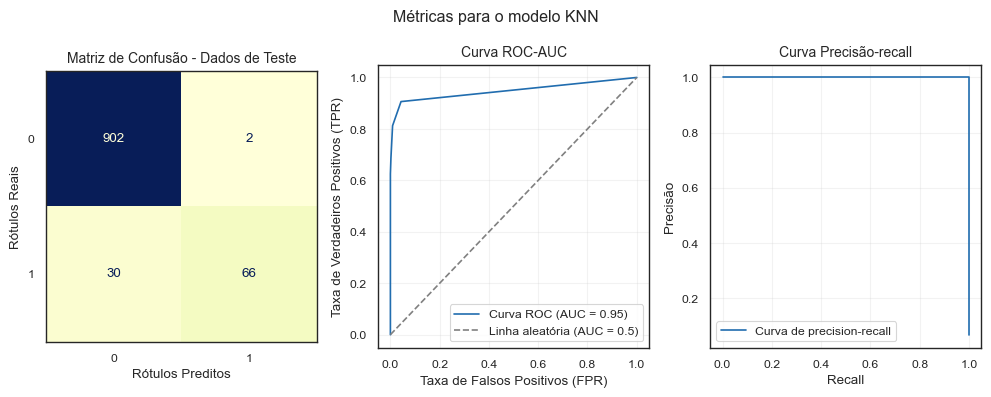

<Figure size 960x720 with 0 Axes>

AdaBoost 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.84      0.83      0.84        96

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9848


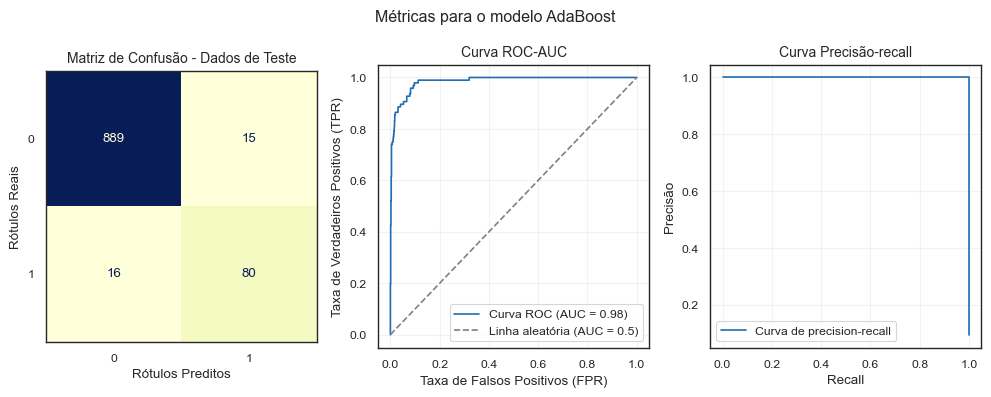

<Figure size 960x720 with 0 Axes>

RandomForest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9985


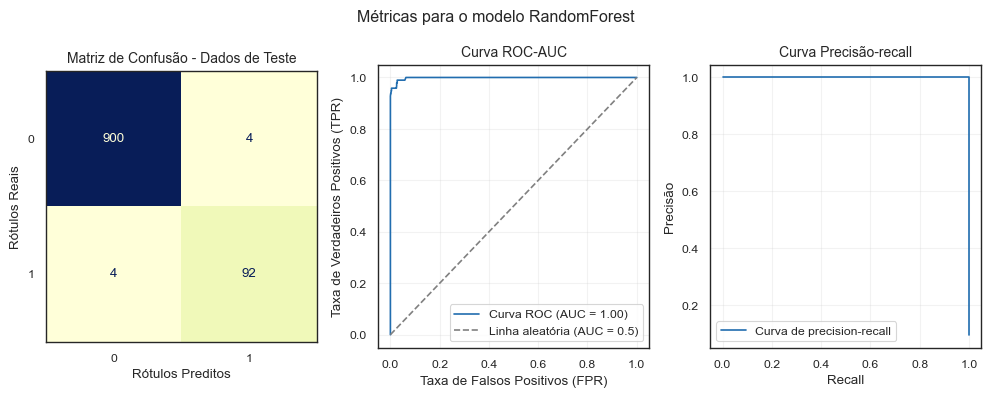

<Figure size 960x720 with 0 Axes>

XGBoost 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.94      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9989


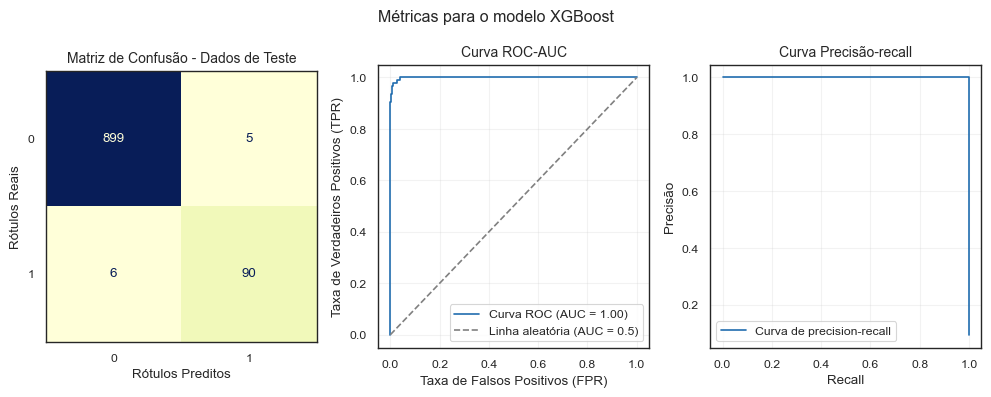

<Figure size 960x720 with 0 Axes>

In [109]:
paleta = sns.color_palette("YlGnBu",)

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42), 
    'KNN': KNeighborsClassifier(), 
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'RandomForest': RandomForestClassifier(random_state=42), 
    'XGBoost': xgb.XGBClassifier(random_state=42) 
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  

    print(f'{model_name} \n{classification_report(y_test, y_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_pred_proba):.4f}')

    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    plt.suptitle(f'Métricas para o modelo {model_name}')

    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax=ax[0])
    ax[0].set_title('Matriz de Confusão - Dados de Teste', fontsize=10)
    ax[0].set_xlabel('Rótulos Preditos')
    ax[0].set_ylabel('Rótulos Reais')

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    ax[1].set_title('Curva ROC-AUC', fontsize=10)
    ax[1].plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color=paleta[4])
    ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
    ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
    ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
    ax[1].legend(loc='lower right')
    ax[1].grid(alpha =.25)

    precision, recall, _ = precision_recall_curve(y_pred, y_pred_proba)
    ax[2].set_title('Curva Precisão-recall', fontsize=10)
    ax[2].plot(recall, precision, label='Curva de precision-recall', color=paleta[4])
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precisão')
    ax[2].legend(loc='best')
    ax[2].grid(alpha =.25)
    plt.tight_layout()
    plt.show()

### Resumo de métricas

In [110]:
models = {
    'LogisticRgression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42), 
    'KNN': KNeighborsClassifier(), 
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'RandomForest': RandomForestClassifier(random_state=42), 
    'XGBoost': xgb.XGBClassifier(random_state=42) 
}

resumo_metricas = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
    ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    resumo_metricas.append({
        'Modelo': model_name,
        'Precisão': precision_score(y_test, y_pred),
        'Acurácia': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'f1-score (weighted)': f1_score(y_test, y_pred, average = "weighted"),
        'f1-score (macro avg)': f1_score(y_test, y_pred, average = "macro")
    })

In [111]:
resumo_metricas_df = pd.DataFrame(resumo_metricas)
resumo_metricas_df.sort_values(by = 'f1-score (macro avg)', ascending = False)

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
4,RandomForest,0.958333,0.992,0.958333,0.992000,0.976954
5,XGBoost,0.947368,0.989,0.937500,0.988974,0.968164
1,DecisionTree,0.910891,0.987,0.958333,0.987147,0.963400
3,AdaBoost,0.842105,0.969,0.833333,0.968927,0.910280
2,KNN,0.970588,0.968,0.687500,0.965512,0.893724
0,LogisticRgression,0.827160,0.957,0.697917,0.955355,0.866737


**Observações**
- A acurácia dos modelos são muito próximas.
- As métricas que consideraremos no nosso modelo de classificação binária é f1-score e precisão porque o custo de falso positivo e um falso negativo são muito grandes, dado que um falso positivo poderia trazer prejuízo ao banco ao conceder crédito para um eventual mau pagador e um falso negativo, o cliente perderia um eventual cliente lucrativo. Nesses casos, o **Random Forest** e o **XGBoost** se destacam como os melhores modelos.

## Otimização de Hiperparâmetros*
*_Busca em grade e validação cruzada._

### Experimento 01 - Random Forest

In [112]:
modelo_rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state = 42))
])

param_grid = {
    'classifier__max_depth': [10, 30, None],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

grid_search_rf = GridSearchCV(modelo_rf, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

**Parâmetros testados no RandomForest**

1. **`max_depth` (Profundidade máxima da árvore)**:
    - **Descrição**: Define a profundidade máxima da árvore de decisão. Controla o número máximo de divisões desde a raiz até uma folha.
    - **Intervalo comum**: `[3, 5, 10, 20, None]`, onde `None` permite que os nós se expandam até que todas as folhas estejam puras ou tenham menos amostras do que o mínimo necessário.
    - **Importância**: Limitar a profundidade da árvore ajuda a reduzir o overfitting em dados complexos. Árvores muito profundas podem memorizar os dados de treinamento e não generalizar bem em novos dados.

2. **`max_features` (Número máximo de características)**:
    - **Descrição**: Especifica o número de características a serem consideradas em cada divisão de nó. Pode ser um valor absoluto ou uma fração das características totais.
    - **Intervalo comum**: `['auto', 'sqrt', 'log2']`, onde `'auto'` usa todas as características, `'sqrt'` usa a raiz quadrada do total de características, e `'log2'` usa o logaritmo na base 2 do total de características.
    - **Importância**: Ajustar o número de características pode afetar a velocidade e a precisão do modelo. Usar uma fração menor pode reduzir o overfitting e acelerar o treinamento, mas pode prejudicar a performance se as características mais importantes não forem selecionadas.

3. **`class_weight` (Peso das classes)**:
    - **Descrição**: Define os pesos das classes para lidar com desbalanceamento de classes, atribuindo maior importância à classe minoritária.
    - **Intervalo comum**: `['balanced', None]`, onde `'balanced'` ajusta o peso inversamente proporcional à frequência de cada classe, e `None` não aplica pesos.
    - **Importância**: Em problemas com classes desbalanceadas, ajustar o peso das classes pode melhorar a performance do modelo ao garantir que ele considere as classes menos frequentes.

In [113]:
print(f'A melhor combinação de parâmetros encontrada é: \n {grid_search_rf.best_params_}')
print(f'O melhor score de validação cruzada é: {grid_search_rf.best_score_:.6f}')

A melhor combinação de parâmetros encontrada é: 
 {'classifier__class_weight': None, 'classifier__max_depth': 30, 'classifier__max_features': 'sqrt'}
O melhor score de validação cruzada é: 0.974846


In [114]:
y_pred = best_model_rf.predict(X_test)
y_pred_proba = best_model_rf.predict_proba(X_test)[:, 1]

print(f'RandomForestClassifier \n {classification_report(y_test, y_pred)}')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.4f}')
print(f'precision_score: {precision_score(y_test, y_pred):.4f}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall_score: {recall_score(y_test, y_pred):.4f}')
print(f'f1_score macro: {f1_score(y_test, y_pred, average = "macro"):.4f}')
print(f'f1_score wighted: {f1_score(y_test, y_pred, average = "weighted"):.4f}')

RandomForestClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

roc auc score: 0.9770
precision_score: 0.9583
accuracy_score: 0.9920
recall_score: 0.9583
f1_score macro: 0.9770
f1_score wighted: 0.9920


In [115]:
metricas_rf = {
    'Modelo': 'RandomForest',
    'Precisão': precision_score(y_test, y_pred),
    'Acurácia': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'f1-score (weighted)': f1_score(y_test, y_pred, average = "weighted"),
    'f1-score (macro avg)': f1_score(y_test, y_pred, average = "macro")
}

metricas_rf_df = pd.DataFrame.from_dict(metricas_rf, orient ='index').T
metricas_rf_df

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
0,RandomForest,0.958333,0.992,0.958333,0.992,0.976954


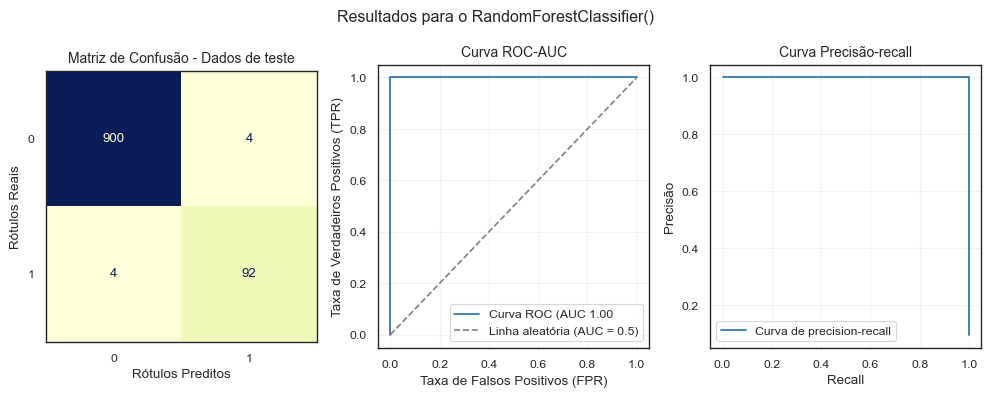

In [116]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))
plt.suptitle('Resultados para o RandomForestClassifier()')

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax = ax[0])
ax[0].set_title('Matriz de Confusão - Dados de teste', fontsize = 10)
ax[0].set_xlabel('Rótulos Preditos')
ax[0].set_ylabel('Rótulos Reais')

fpr, tpr, _ = roc_curve(y_pred, y_pred_proba)
roc_auc = roc_auc_score(y_pred, y_pred_proba)
ax[1].plot(fpr, tpr, label = f'Curva ROC (AUC {roc_auc:.2f}', color = paleta[4])
ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
ax[1].set_title('Curva ROC-AUC', fontsize=10)
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].legend(loc = 'lower right')
ax[1].grid(alpha = .25)

precision, recall, _ = precision_recall_curve(y_pred, y_pred_proba)
ax[2].set_title('Curva Precisão-recall', fontsize=10)
ax[2].plot(recall, precision, label='Curva de precision-recall', color=paleta[4])
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precisão')
ax[2].legend(loc='best')
ax[2].grid(alpha =.25)

plt.tight_layout()
plt.show()

### Experimento 01 - Importância das variáveis 

In [117]:
ohe = preprocessor.transformers_[1][1]  
categorical_columns = ohe.get_feature_names_out(input_features=categorical_features)
list(categorical_columns)

['Education_Graduacao', 'Education_Mestrado', 'Education_Nível Avançado']

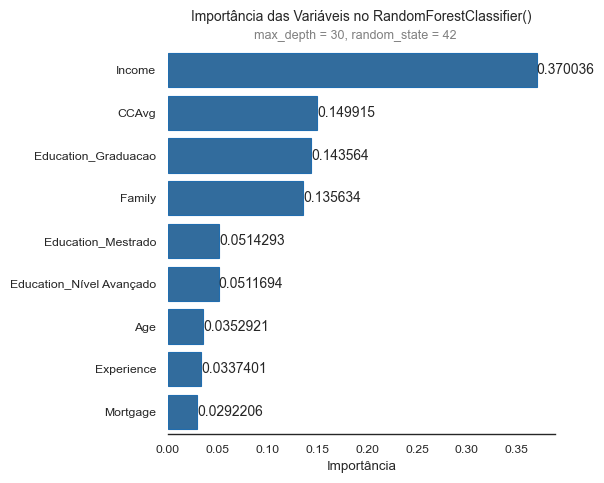

In [118]:
importances_rf = best_model_rf.named_steps['classifier'].feature_importances_
all_columns = numerical_features + list(categorical_columns)  

importance_rf_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances_rf
})

importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(5, 5))
paleta = sns.color_palette('YlGnBu')
ax = sns.barplot(data = importance_rf_df, y = importance_rf_df['Feature'], x = importance_rf_df['Importance'], 
                 color = paleta[4], edgecolor = paleta[4])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Importância')
plt.ylabel('')
plt.title('Importância das Variáveis no RandomForestClassifier()', y = 1.05, fontsize=10)
plt.figtext(0.5, 0.9, 'max_depth = 30, random_state = 42', ha='center', color = 'gray', fontsize=9)
plt.gca().invert_yaxis() 
sns.despine(left=True)
plt.show()

As variáveis mais importantes no modelo de acordo com o RandomForest são **'Income'** e **'CCAvg'**. Isso está em consonância com as análise de estatísticas das featires por classes em que as médias das variáveis de tais variáveis por grupos (classes) tiveram a maior diferença. A importância no RandomForest é medida pela redução média da impureza (Gini importance, Entropy, Mean Decrease Impurity) ao longo de todas as árvores cada vez que a variável é usada em uma divisão ponderada pelo número de amostras. É importante lembrar que essas variáveis são altamente correlacionadas, embora uma tenha proporção de importância relativamente maior que a outra no modelo. As variáveis **'CCAvg'**, **'Education_Graduacao'** e **'Family'** têm valores de importância muito semelhantes. 

### Experimento 02 - XGBoost

In [119]:
modelo_xgb = Pipeline(steps=[
    ('classifier', xgb.XGBClassifier(random_state=42))
])

param_grid = {
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [0.1, 1, 10],
    'classifier__scale_pos_weight': [None, 10]
}

grid_search_xgb = GridSearchCV(modelo_xgb, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_

**Parâmetros testados no XGBoost**:

1. **`colsample_bytree`**:
   - **Descrição**: Proporção de variáveis (features) a serem usadas para construir cada árvore.
   - **Intervalo comum**: `[0.6, 0.8, 1.0]`
   - **Importância**: Similar ao `subsample`, mas no nível das características. Valores menores podem ajudar a reduzir o overfitting.

2. **`gamma` (ou `min_split_loss`)**:
   - **Descrição**: A penalização de complexidade do modelo (quanto maior o valor, mais conservador o modelo).
   - **Intervalo comum**: `[0, 0.1, 0.2, 0.3]`
   - **Importância**: Controla o número de divisões realizadas pela árvore. Um valor maior faz com que o modelo seja mais simples e menos propenso ao overfitting.

3. **`scale_pos_weight`**:
   - **Descrição**: Usado para lidar com conjuntos de dados desbalanceados, ajustando o peso de cada classe.
   - **Intervalo comum**: Normalmente, é o valor da razão entre a quantidade de instâncias da classe negativa e a quantidade de instâncias da classe positiva no conjunto de dados.
   - **Importância**: Utilizado principalmente quando o problema é desbalanceado.

4. **`reg_alpha` (L1 regularization)**:
    - **Descrição**: Parâmetro de regularização L1 (semelhante ao Lasso na regressão linear).
    - **Intervalo comum**: `[0, 0.01, 0.1, 1, 10]`
    - **Importância**: Regularização L1 pode ajudar a reduzir o overfitting, promovendo um modelo mais simples.

5. **`reg_lambda` (L2 regularization)**:
    - **Descrição**: Parâmetro de regularização L2 (semelhante ao Ridge na regressão linear).
    - **Intervalo comum**: `[0, 0.01, 0.1, 1, 10]`
    - **Importância**: Regularização L2 ajuda a controlar o overfitting e melhora a generalização do modelo.

In [120]:
print(f'A melhor combinação de parâmetros encontrada é: \n {grid_search_xgb.best_params_}')
print(f'O melhor score de validação cruzada é: {grid_search_xgb.best_score_:.6f}')

A melhor combinação de parâmetros encontrada é: 
 {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0, 'classifier__reg_alpha': 0.5, 'classifier__reg_lambda': 10, 'classifier__scale_pos_weight': None}
O melhor score de validação cruzada é: 0.961152


In [121]:
y_pred = best_model_xgb.predict(X_test)
y_pred_proba = best_model_xgb.predict_proba(X_test)[:, 1]

print(f'XGBClassifier \n {classification_report(y_test, y_pred)}')

print('Resumo das Métricas: \n')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.4f}')
print(f'precision_score: {precision_score(y_test, y_pred):.4f}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall_score: {recall_score(y_test, y_pred):.4f}')
print(f'f1_score macro: {f1_score(y_test, y_pred, average = "macro"):.4f}')
print(f'f1_score wighted: {f1_score(y_test, y_pred, average = "weighted"):.4f}')

XGBClassifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.94      0.95      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Resumo das Métricas: 

roc auc score: 0.9706
precision_score: 0.9381
accuracy_score: 0.9890
recall_score: 0.9479
f1_score macro: 0.9685
f1_score wighted: 0.9890


In [122]:
metricas_xgb = {
    'Modelo': 'XGBoost',
    'Precisão': precision_score(y_test, y_pred),
    'Acurácia': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'f1-score (weighted)': f1_score(y_test, y_pred, average = "weighted"),
    'f1-score (macro avg)': f1_score(y_test, y_pred, average = "macro")
}

metricas_xgb_df = pd.DataFrame.from_dict(metricas_xgb, orient ='index').T
metricas_xgb_df

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
0,XGBoost,0.938144,0.989,0.947917,0.989025,0.968459


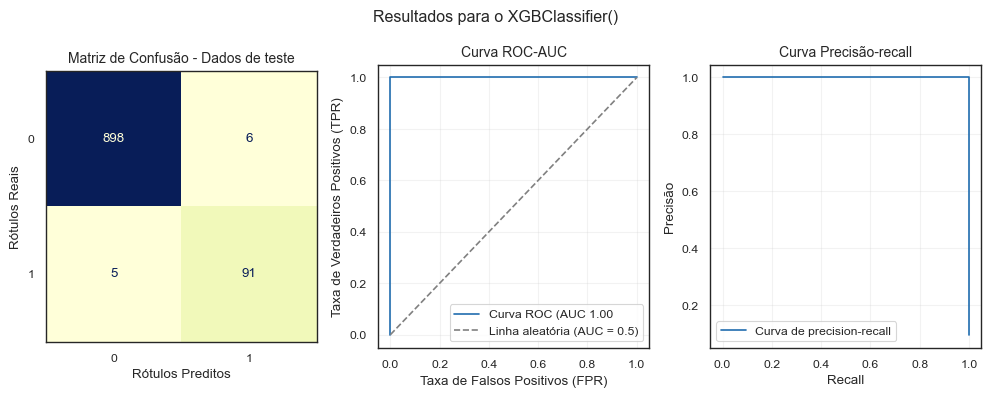

In [123]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))
plt.suptitle('Resultados para o XGBClassifier()')

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax = ax[0])
ax[0].set_title('Matriz de Confusão - Dados de teste', fontsize = 10)
ax[0].set_xlabel('Rótulos Preditos')
ax[0].set_ylabel('Rótulos Reais')

fpr, tpr, _ = roc_curve(y_pred, y_pred_proba)
roc_auc = roc_auc_score(y_pred, y_pred_proba)

ax[1].plot(fpr, tpr, label = f'Curva ROC (AUC {roc_auc:.2f}', color = paleta[4])
ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
ax[1].set_title('Curva ROC-AUC', fontsize=10)
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].legend(loc = 'lower right')
ax[1].grid(alpha = .25)

precision, recall, _ = precision_recall_curve(y_pred, y_pred_proba)
ax[2].set_title('Curva Precisão-recall', fontsize=10)
ax[2].plot(recall, precision, label='Curva de precision-recall', color=paleta[4])
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precisão')
ax[2].legend(loc='best')
ax[2].grid(alpha =.25)

plt.tight_layout()
plt.show()

### Experimento 02 - Importância das variáveis

In [124]:
ohe = preprocessor.transformers_[1][1] 
categorical_columns = ohe.get_feature_names_out(input_features=categorical_features)
list(categorical_columns)

['Education_Graduacao', 'Education_Mestrado', 'Education_Nível Avançado']

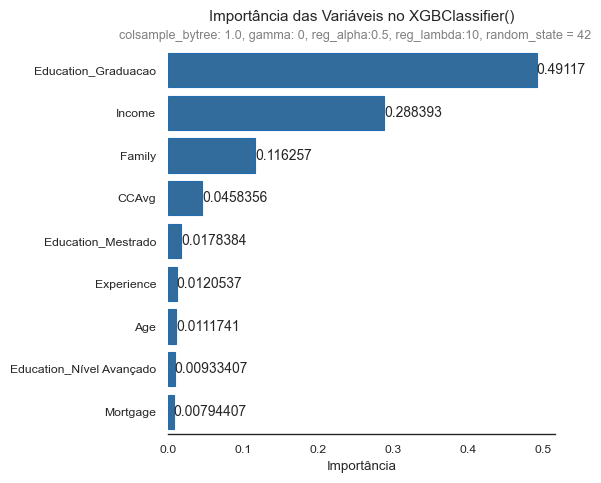

In [125]:
importances_xgb = best_model_xgb.named_steps['classifier'].feature_importances_
all_columns = numerical_features + list(categorical_columns)  

importance_xgb_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances_xgb
})

importance_xgb_df = importance_xgb_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(5, 5))
paleta = sns.color_palette('YlGnBu')
ax = sns.barplot(data = importance_xgb_df, y = importance_xgb_df['Feature'], x = importance_xgb_df['Importance'], 
                 color = paleta[4], edgecolor = paleta[4])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Importância')
plt.ylabel('')
plt.title('Importância das Variáveis no XGBClassifier()', y = 1.05, fontsize = 11)
plt.figtext(0.5, 0.9, 'colsample_bytree: 1.0, gamma: 0, reg_alpha:0.5, reg_lambda:10, random_state = 42', 
            ha='center', color = 'gray', fontsize=9)

plt.gca().invert_yaxis() 
sns.despine(left=True)
plt.show()

O XGBoost elencou as as mesmas variáveis que o RandomForest nas 4 primeiras posições - **'Education_Graduacao'**, **'Income'**, **'Family'** e **'CCAvg'**- mas em ordem distinta.
O XGBoost usa algumas métricas para avaliar a importância das variáveis:
- **Weight (Frequência)**: Conta o número de vezes que uma variável é usada para dividir os dados nas árvores. É simples, mas nem sempre reflete o impacto de cada variável.
- **Gain**: Representa o ganho médio em erro (ou perda) ao utilizar uma variável para divisão, sendo uma das métricas mais úteis para interpretação, pois mostra a importância em termos de melhoria de predição.
- **Cover**: Mede a cobertura, ou seja, o número de amostras afetadas pelas divisões onde a variável é usada. Quanto maior a cobertura, maior a sua presença no conjunto de dados.

### Resumo de métricas

**Métricas dos modelos com hiperparâmetros otimizados**

In [140]:
df_metricas_concatenadas = pd.concat([metricas_rf_df, metricas_xgb_df], axis=0, ignore_index=True)
df_metricas_concatenadas

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
0,RandomForest,0.958333,0.992,0.958333,0.992,0.976954
1,XGBoost,0.938144,0.989,0.947917,0.989025,0.968459


**Métricas dos modelos com hiperparâmetros em default**

In [141]:
resumo_metricas_df.sort_values(by = 'f1-score (macro avg)', ascending = False).iloc[:2, :]

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
4,RandomForest,0.958333,0.992,0.958333,0.992000,0.976954
5,XGBoost,0.947368,0.989,0.937500,0.988974,0.968164


## Recomendação de modelo

O modelo que recomendamos é o RandomForestClassifier(random_state = 42) com os hiperparâmetros em default ([documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) porque de todos os modelos testados o RandomForest apresentou os melhores resultados para as métricas de precisão e f1-score. Das 96 instâncias realmente positivas (crédito pessoal aprovado) no conjunto de teste, 92 foram classificadas corretamente pelo modelo  mostrando ser a melhor solução para o problema de negócio.

## Apêndice 

### Experimento Extra - Random Forest com features selecionadas 

- Retirar as variáveis com pouca importância pode não ter um impacto significativo no modelo, mas retirá-las torna mais simples e interpretável. Os critérios para seleção das variáveis são aquelas com importância superior a 0.01.
- Da correlação, percebemos que **'Experience'** e **'Age'** são variáveis altamente correlacionadas. Por isso, além das variáveis **'CCAvg'** e **Education**, a variável **_Age_** também será eliminada.

In [129]:
# pré-processamento
df['Education'] = df['Education'].replace({1: 'Graduacao', 2: 'Mestrado', 3: 'Nível Avançado'})

X = df.drop(columns = ['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = df['Personal.Loan']

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)
numerical_features = ['Experience', 'Income', 'Family', 'Mortgage']
categorical_features = ['Education']

In [130]:
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train_selected = preprocessor.fit_transform(X_train_selected)
X_test_selected = preprocessor.transform(X_test_selected)

In [131]:
modelo_selected = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state = 42))
])

param_grid = {
    'classifier__max_depth': [10, 30, None],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

grid_search_selected = GridSearchCV(modelo_selected, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search_selected.fit(X_train_selected, y_train)
best_model_selected = grid_search_selected.best_estimator_

In [132]:
print(f'A melhor combinação de parâmetros encontrada é: \n {grid_search_selected.best_params_}')
print(f'O melhor score de validação cruzada é: {grid_search_selected.best_score_:.6f}')

A melhor combinação de parâmetros encontrada é: 
 {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt'}
O melhor score de validação cruzada é: 0.958951


In [133]:
y_pred = best_model_selected.predict(X_test_selected)
y_pred_proba = best_model_selected.predict_proba(X_test_selected)[:, 1]

print(f'RandomForestClassifier \n {classification_report(y_test, y_pred)}')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.4f}')

print(f'precision_score: {precision_score(y_test, y_pred):.4f}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall_score: {recall_score(y_test, y_pred):.4f}')
print(f'f1_score macro: {f1_score(y_test, y_pred, average = "macro"):.4f}')
print(f'f1_score wighted: {f1_score(y_test, y_pred, average = "weighted"):.4f}')

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.91      0.90      0.91        96

    accuracy                           0.98      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000

roc auc score: 0.9435
precision_score: 0.9149
accuracy_score: 0.9820
recall_score: 0.8958
f1_score macro: 0.9477
f1_score wighted: 0.9819


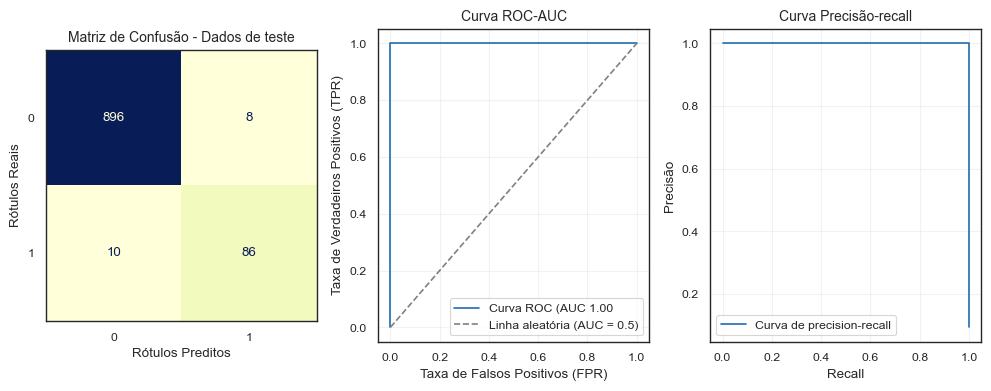

In [134]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax = ax[0])
ax[0].set_title('Matriz de Confusão - Dados de teste', fontsize = 10)
ax[0].set_xlabel('Rótulos Preditos')
ax[0].set_ylabel('Rótulos Reais')

fpr, tpr, _ = roc_curve(y_pred, y_pred_proba)
roc_auc = roc_auc_score(y_pred, y_pred_proba)

ax[1].plot(fpr, tpr, label = f'Curva ROC (AUC {roc_auc:.2f}', color = paleta[4])
ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
ax[1].set_title('Curva ROC-AUC', fontsize=10)
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].legend(loc = 'lower right')
ax[1].grid(alpha = .25)

precision, recall, _ = precision_recall_curve(y_pred, y_pred_proba)
ax[2].set_title('Curva Precisão-recall', fontsize=10)
ax[2].plot(recall, precision, label='Curva de precision-recall', color=paleta[4])
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precisão')
ax[2].legend(loc='best')
ax[2].grid(alpha =.25)

plt.tight_layout()
plt.show()

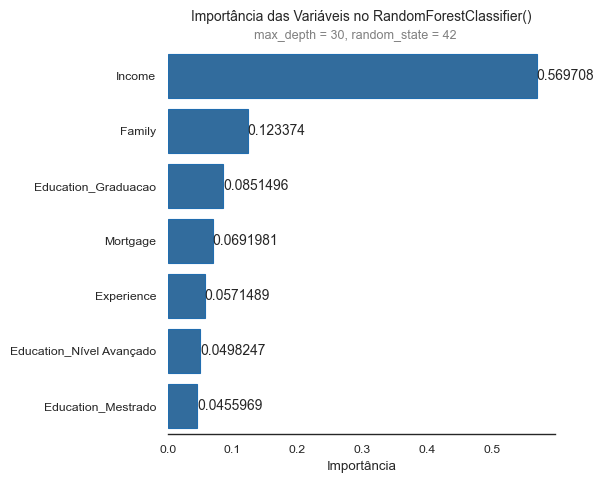

In [135]:
importances_selected = best_model_selected.named_steps['classifier'].feature_importances_
all_columns = numerical_features + list(categorical_columns)  

importance_selected_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances_selected
})

importance_selected_df = importance_selected_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(5, 5))
paleta = sns.color_palette('YlGnBu')
ax = sns.barplot(data = importance_selected_df, y = importance_selected_df['Feature'], x = importance_selected_df['Importance'], 
                 color = paleta[4], edgecolor = paleta[4])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Importância')
plt.ylabel('')
plt.title('Importância das Variáveis no RandomForestClassifier()', y = 1.05, fontsize=10)
plt.figtext(0.5, 0.9, 'max_depth = 30, random_state = 42', ha='center', color = 'gray', fontsize=9)
plt.gca().invert_yaxis() 
sns.despine(left=True)
plt.show()

Sem as variáveis **'Age'** e **'CCAvg'**, a variável **'Income'** ganhou uma importância consideravelmente maior no comparativo com as duas variáveis subsequentes. As métricas de precisão e f1-score (macro avg) para este modelo simplificado foram sutilmente mais baixas. Isso pode ser explicado pelos seguintes motivos:

1. **Contribuição Conjunta das Variáveis**: Em modelos de Random Forest, mesmo variáveis com baixa importância podem colaborar indiretamente para a performance geral, especialmente se tiverem interações úteis com outras variáveis.

2. **Aleatoriedade na Importância**: A importância atribuída às variáveis em Random Forests pode ter variação entre rodadas de treinamento. Assim, uma variável com importância aparentemente baixa em uma execução pode ser mais relevante em outra, dependendo de como as árvores são construídas.

3. **Esparsidade e Informações Mínimas**: Em conjuntos de dados com poucas variáveis, mesmo as menos importantes podem ajudar a capturar pequenas variações ou padrões, especialmente se os dados têm alguma complexidade não linear.

4. **Desbalanceamento de Classes ou Outras Características de Dados**: Em dados desbalanceados ou com ruídos, o modelo pode estar usando todas as variáveis para capturar melhor essas nuances e separar as classes.